In [789]:
#written by Ronald Liu and Brandon Ming

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df = pd.read_csv("474.csv")
df.head()

,Unnamed: 0,date,unemp_rate,total_pop,labour_force,not_labour_force,males_tpop,females_tpop,males_lfpop,females_lfpop,...,job_leavers,job_losers,GDP,CPI,GSPTSE,no _degree,high_school,diploma,uni,immigrants_5yrs
0,10-Jan,2010/01,8.4,27399.6,18073.9,9325.7,13476.2,13923.4,9460.6,8613.4,...,259.5,862.7,1597445,115.1,11847.3,2322.6,3706.8,6243.9,4444.6,539.6
1,10-Feb,2010/02,8.3,27429.1,18109.5,9319.6,13490.7,13938.4,9484.7,8624.8,...,249.7,833.8,1605791,115.6,11147.5,2372.8,3664.4,6217.3,4479.4,534.2
2,10-Mar,2010/03,8.3,27457.8,18152.9,9305.0,13504.7,13953.2,9510.5,8642.4,...,264.8,822.4,1613553,115.6,11682.8,2429.0,3628.1,6296.9,4434.5,534.2
3,10-Apr,2010/04,8.2,27487.7,18295.9,9191.9,13519.4,13968.4,9609.0,8686.8,...,248.0,761.9,1611607,116.0,12069.9,2469.8,3628.7,6378.5,4457.7,538.6
4,10-May,2010/05,8.1,27518.8,18645.9,8872.9,13534.5,13984.3,9814.2,8831.7,...,295.9,686.0,1618706,116.3,12274.0,2509.1,3685.3,6433.3,4532.6,551.6


In [790]:
#df["job_vacancies"]
n = df.shape[0]
print("Size of dataframe: " + str(n))

Size of dataframe: 109


In [791]:
df = df.dropna(axis=0)

In [792]:
n = df.shape[0]
print("Size of dataframe: " + str(n))

Size of dataframe: 95


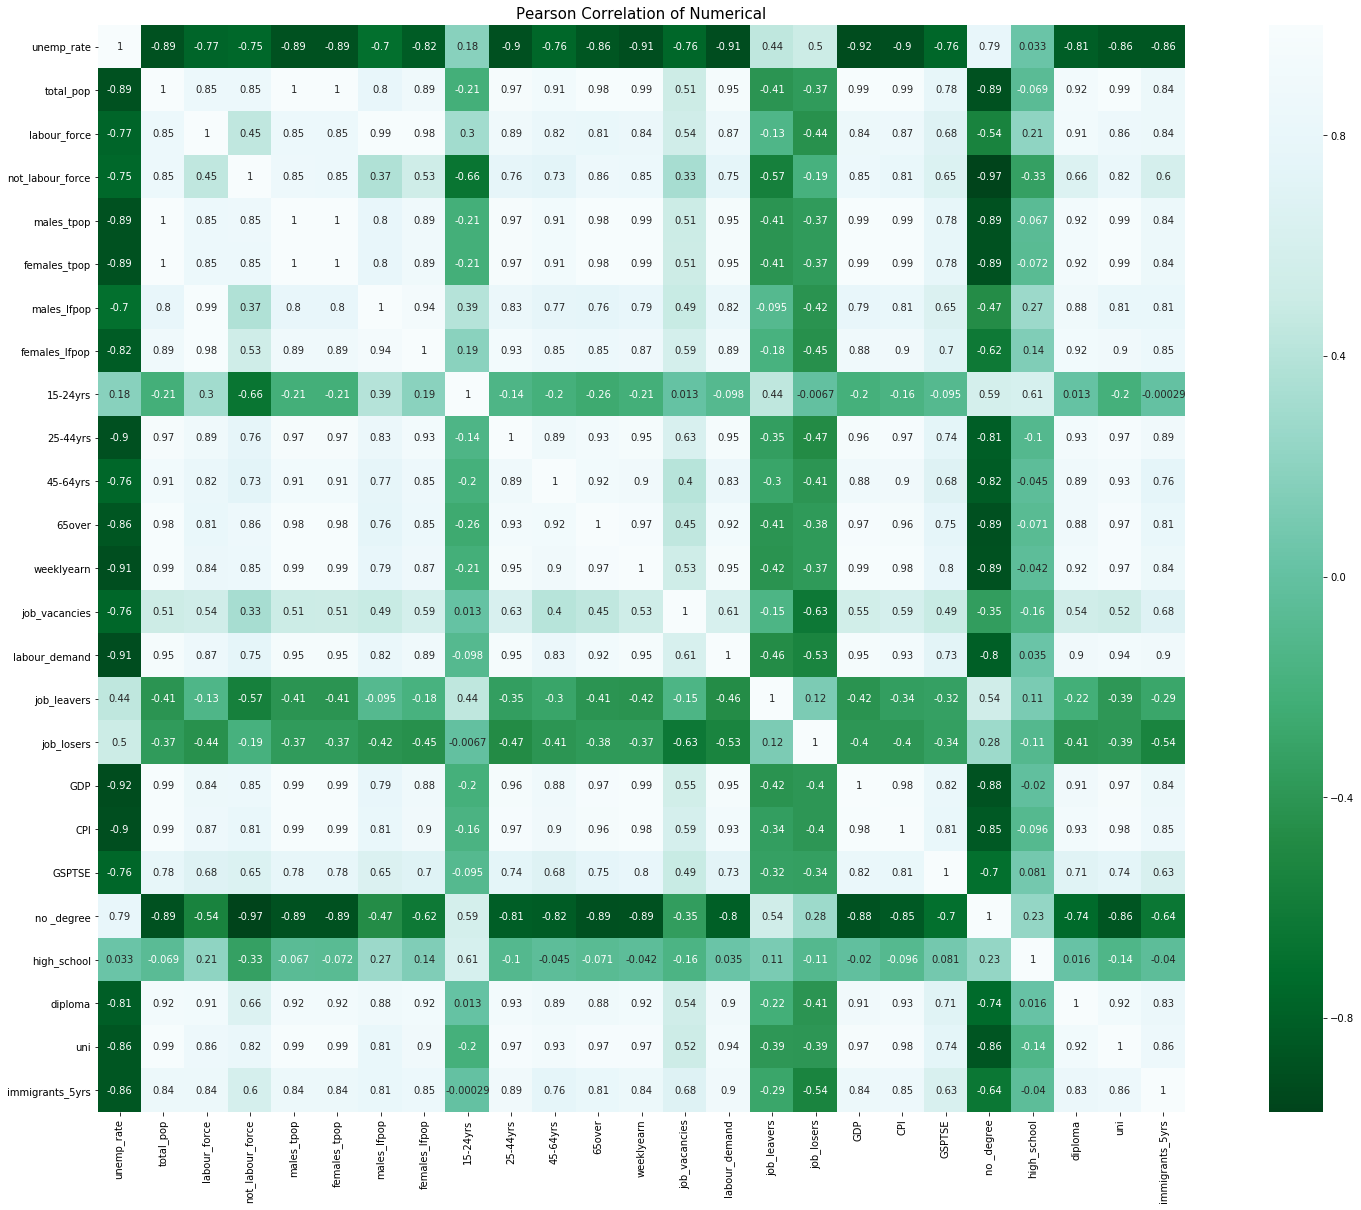

In [794]:
features_numerical = list(df)

plot.subplots(figsize=(30, 20))
sns.heatmap(df[features_numerical].corr(), vmax=1.0, square=True, cmap="BuGn_r", annot=True)
plot.title("Pearson Correlation of Numerical", fontsize=15)
plot.show()

In [795]:
tpop_sex_ratio = df["males_tpop"]/ df["females_tpop"]
#df["males_tpop"]
df = df.drop(['males_tpop', 'females_tpop'], axis=1)
df["tpop_sex_ratio"] = tpop_sex_ratio


In [796]:
lfpop_sex_ratio = df["males_lfpop"]/ df["females_lfpop"]
#print(lfpop_sex_ratio)
df = df.drop(['males_lfpop', 'females_lfpop'], axis=1)
df["lfpop_sex_ratio"] = lfpop_sex_ratio

In [797]:
job_ratio = df["job_losers"]/ df["job_vacancies"]
#print(job_ratio)
#df = df.drop(['males_lfpop', 'females_lfpop'], axis=1)
df["job_ratio"] = job_ratio


In [798]:
job_pairs = df[["job_losers","job_vacancies"]]
#print(job_pairs)
#df = df.drop(['job_losers', 'job_vacancies'], axis=1)
#df["job_pairs"] = job_pairs



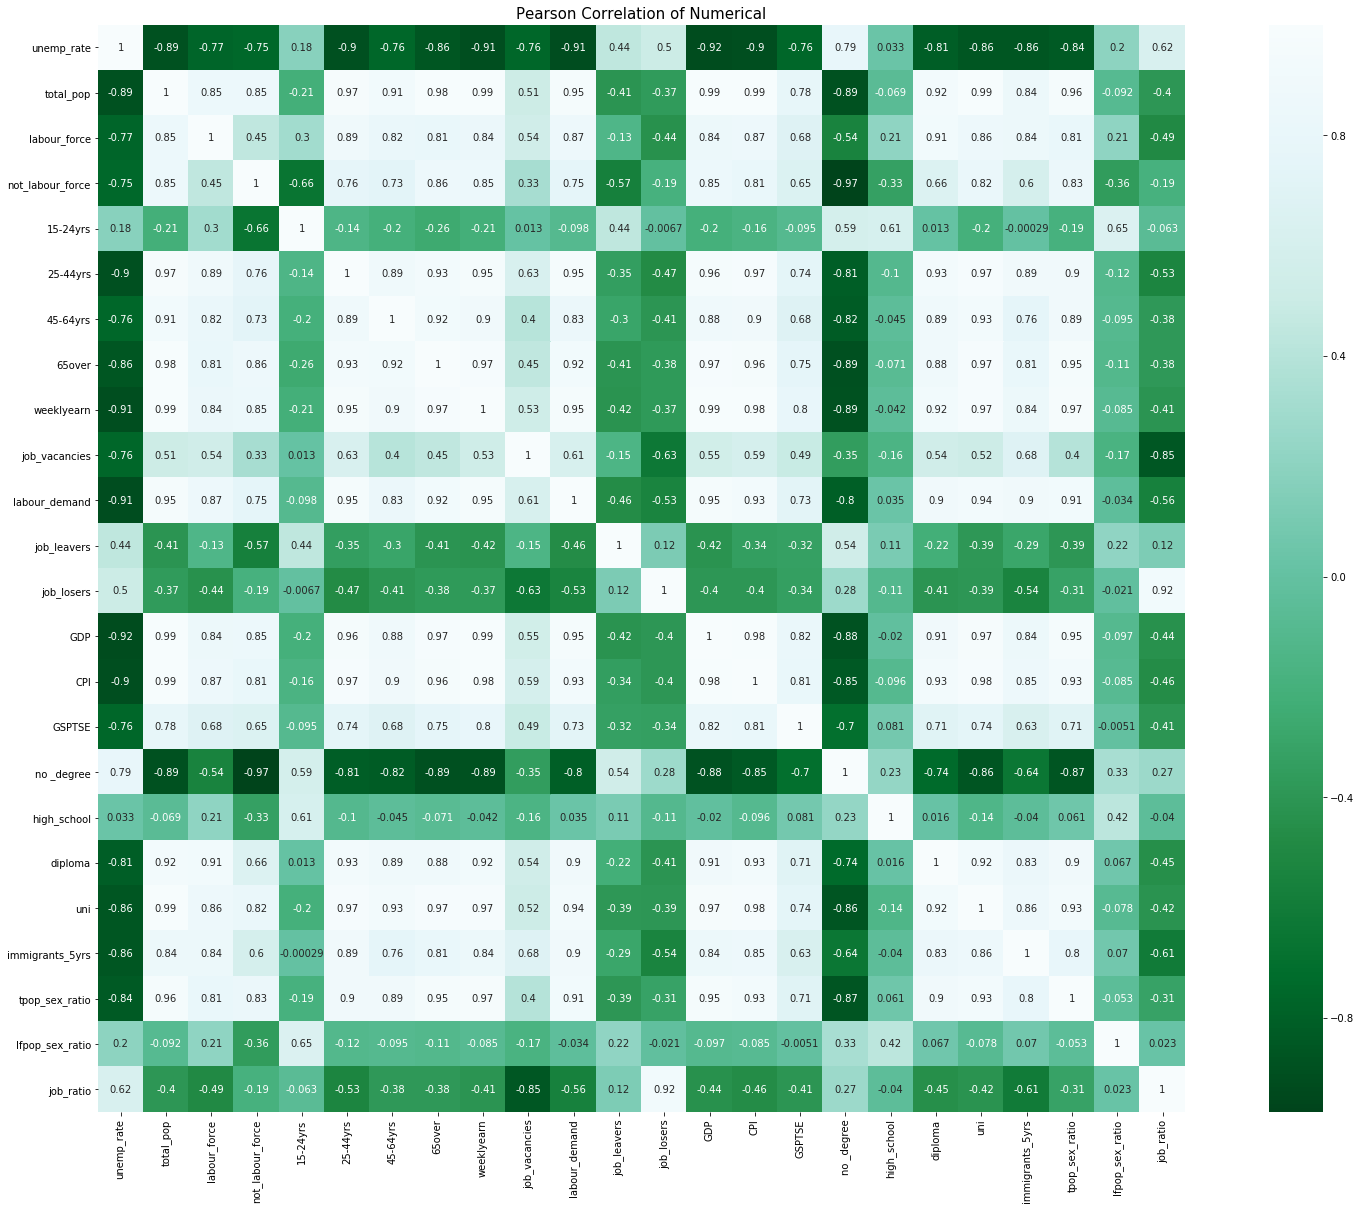

In [799]:
features_numerical = list(df)

plot.subplots(figsize=(30, 20))
sns.heatmap(df[features_numerical].corr(), vmax=1.0, square=True, cmap="BuGn_r", annot=True)
plot.title("Pearson Correlation of Numerical", fontsize=15)
plot.show()

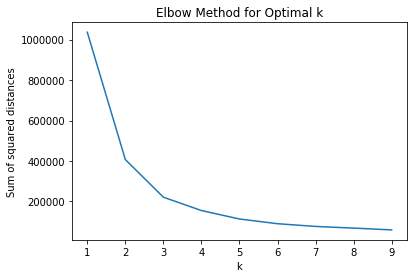

In [800]:
sum_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(job_pairs)
    sum_squared_distances.append(km.inertia_)

plot.plot(K, sum_squared_distances)
plot.title("Elbow Method for Optimal k")
plot.xlabel("k")
plot.ylabel("Sum of squared distances")
plot.show()

In [801]:
km = KMeans(n_clusters=2).fit(job_pairs)
centroids = km.cluster_centers_
print(centroids)

[[489.14081633 272.32857143]
 [645.31086957 226.03478261]]


In [802]:
clusters = []

for x, y in zip(df["job_losers"], df["job_vacancies"]):
    distance_min = float("inf")
    cluster = -1
    for i in range(len(centroids)):
        xx = centroids[i][0]
        yy = centroids[i][1]
        distance = np.sqrt((x - xx)**2 + (y - yy)**2)
        if distance < distance_min:
            distance_min = distance
            cluster = i
    clusters.append(cluster)

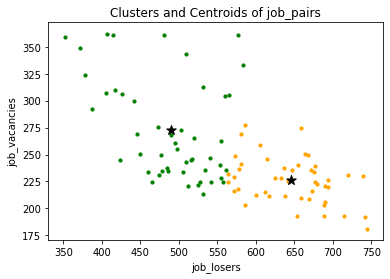

In [803]:
colors = ['green','orange','brown','dodgerblue','red']

for i in range(0,95):
    plot.scatter(df["job_losers"][i+14], df["job_vacancies"][i+14], c=colors[clusters[i]], s=10)

plot.scatter(centroids[:,0], centroids[:,1], marker="*", c="black", s=100)
plot.title("Clusters and Centroids of job_pairs")
plot.xlabel("job_losers")
plot.ylabel("job_vacancies")
plot.show()

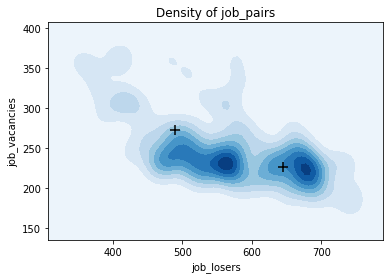

In [804]:
sns.kdeplot(df["job_losers"], df["job_vacancies"], cmap="Blues", shade=True, shade_lowest=True, bw=15)
plot.scatter(centroids[:,0], centroids[:,1], marker="+", c="black", s=100)
plot.title("Density of job_pairs")
plot.xlabel("job_losers")
plot.ylabel("job_vacancies")
plot.show()

In [806]:
dummies = pd.get_dummies(clusters, prefix="area")

df_tmp = pd.DataFrame( { "area_0":np.linspace(0,0,14), "area_1":np.linspace(0,0,14) } ) 
df_tmp = df_tmp.append(dummies, ignore_index = True)

df = pd.concat([df, df_tmp], axis=1)
dummies

,area_0,area_1
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0


In [807]:
df = df.dropna(axis=0)
df

,Unnamed: 0,date,unemp_rate,total_pop,labour_force,not_labour_force,15-24yrs,25-44yrs,45-64yrs,65over,...,no _degree,high_school,diploma,uni,immigrants_5yrs,tpop_sex_ratio,lfpop_sex_ratio,job_ratio,area_0,area_1
14,11-Mar,2011/03,7.7,27805.0,18357.5,9447.5,2717.9,7850.0,7256.7,533.0,...,2270.7,3567.6,6497.4,4637.1,550.1,0.967723,1.107707,3.215840,0.0,1.0
15,11-Apr,2011/04,7.7,27829.3,18479.8,9349.5,2725.9,7884.4,7327.8,541.6,...,2324.3,3582.0,6538.0,4671.7,548.0,0.967722,1.110940,2.851380,0.0,1.0
16,11-May,2011/05,7.6,27860.4,18806.7,9053.7,3023.6,7916.8,7316.0,550.3,...,2417.1,3663.2,6588.4,4681.8,566.0,0.967730,1.110930,2.445055,0.0,1.0
17,11-Jun,2011/06,7.5,27887.4,18934.2,8953.2,3091.7,7968.6,7306.1,567.8,...,2406.6,3732.3,6592.0,4752.5,587.6,0.967740,1.113132,2.105844,1.0,0.0
18,11-Jul,2011/07,7.4,27921.6,18991.0,8930.6,3342.3,7879.9,7215.2,553.6,...,2553.3,3828.3,6583.1,4591.5,605.2,0.967848,1.131067,2.375847,1.0,0.0
19,11-Aug,2011/08,7.4,27962.5,19041.7,8920.8,3219.9,8012.7,7272.3,536.9,...,2464.7,3883.1,6650.9,4677.5,614.6,0.967971,1.117851,2.649361,0.0,1.0
20,11-Sep,2011/09,7.3,27994.6,18620.2,9374.4,2805.7,7994.5,7267.7,552.2,...,2317.6,3789.8,6627.7,4636.1,596.8,0.968062,1.117003,1.909928,1.0,0.0
21,11-Oct,2011/10,7.4,28024.4,18575.9,9448.5,2776.4,7960.5,7268.3,570.7,...,2273.9,3752.0,6613.6,4684.0,572.9,0.968185,1.115008,1.952530,1.0,0.0
22,11-Nov,2011/11,7.4,28052.4,18555.5,9496.9,2763.8,7935.2,7275.8,580.7,...,2267.2,3813.8,6543.7,4686.7,546.2,0.968286,1.108268,2.268707,1.0,0.0
23,11-Dec,2011/12,7.5,28080.3,18467.8,9612.5,2707.7,7899.1,7288.6,572.4,...,2197.8,3791.2,6551.9,4657.2,541.0,0.968406,1.108991,2.415886,1.0,0.0


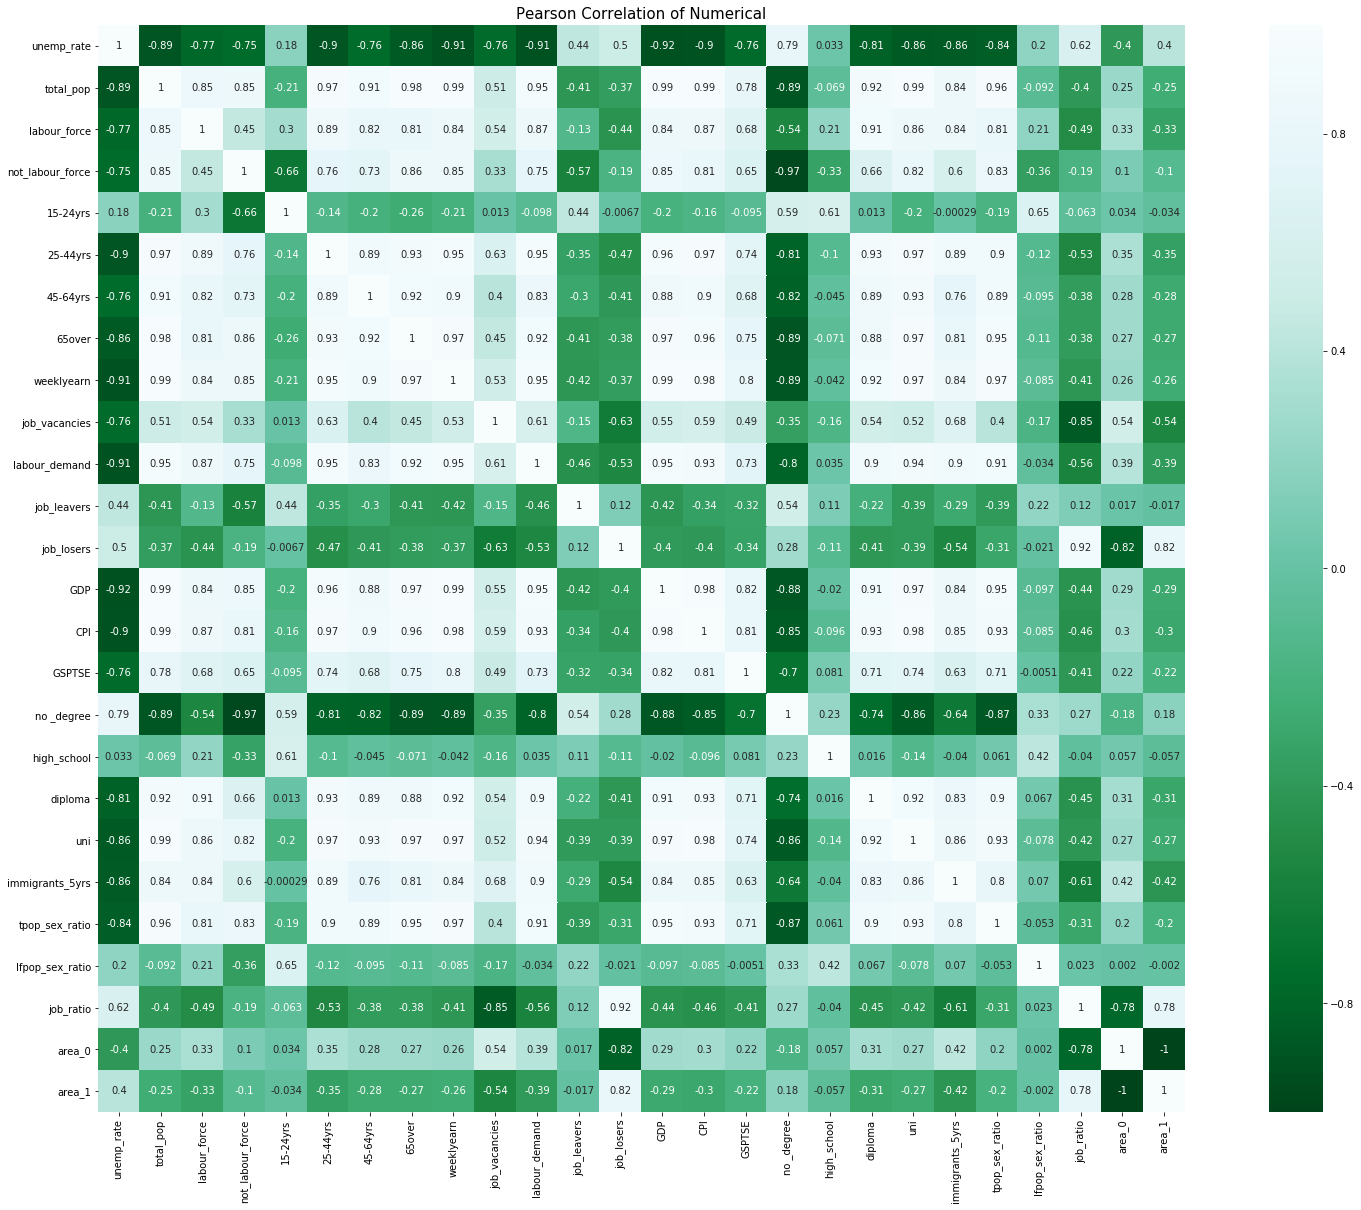

In [808]:
features_numerical = list(df)
plot.subplots(figsize=(30, 20))
sns.heatmap(df[features_numerical].corr(), vmax=1.0, square=True, cmap="BuGn_r", annot=True)
plot.title("Pearson Correlation of Numerical", fontsize=15)
plot.show()

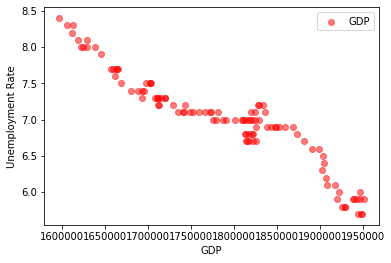

In [783]:
plot.scatter(df["GDP"],df["unemp_rate"], c="r", alpha=0.5, label="GDP")
#plt.scatter(df["GDP"],df["unemp_rate"], c="r", alpha=0.1, label="GDP2")
plot.xlabel("GDP")
plot.ylabel("Unemployment Rate")
plot.legend()
plot.show()

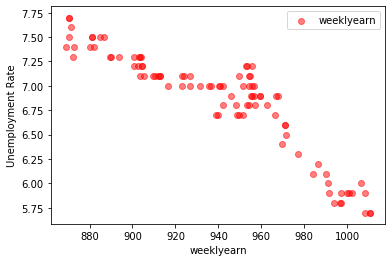

In [540]:
plot.scatter(df["weeklyearn"],df["unemp_rate"], c="r", alpha=0.5, label="weeklyearn")
#plt.scatter(df["GDP"],df["unemp_rate"], c="r", alpha=0.1, label="GDP2")
plot.xlabel("weeklyearn")
plot.ylabel("Unemployment Rate")
plot.legend()
plot.show()

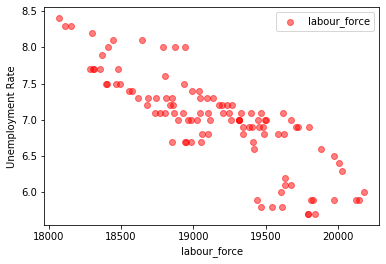

In [784]:
plot.scatter(df["labour_force"],df["unemp_rate"], c="r", alpha=0.5, label="labour_force")
#plt.scatter(df["GDP"],df["unemp_rate"], c="r", alpha=0.1, label="GDP2")
plot.xlabel("labour_force")
plot.ylabel("Unemployment Rate")
plot.legend()
plot.show()

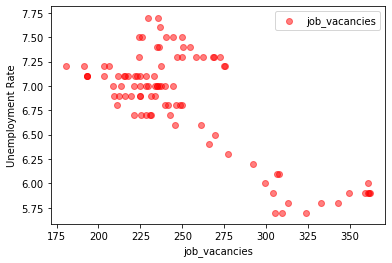

In [785]:
plot.scatter(df["job_vacancies"],df["unemp_rate"], c="r", alpha=0.5, label="job_vacancies")
#plt.scatter(df["GDP"],df["unemp_rate"], c="r", alpha=0.1, label="GDP2")
plot.xlabel("job_vacancies")
plot.ylabel("Unemployment Rate")
plot.legend()
plot.show()

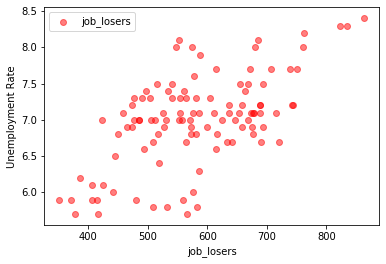

In [786]:
plot.scatter(df["job_losers"],df["unemp_rate"], c="r", alpha=0.5, label="job_losers")
#plt.scatter(df["GDP"],df["unemp_rate"], c="r", alpha=0.1, label="GDP2")
plot.xlabel("job_losers")
plot.ylabel("Unemployment Rate")
plot.legend()
plot.show()

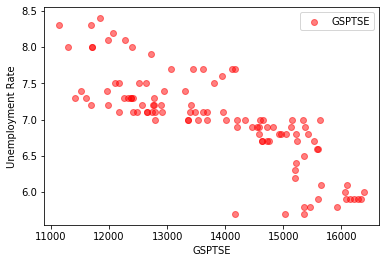

In [787]:
plot.scatter(df["GSPTSE"],df["unemp_rate"], c="r", alpha=0.5, label="GSPTSE")
#plt.scatter(df["GDP"],df["unemp_rate"], c="r", alpha=0.1, label="GDP2")
plot.xlabel("GSPTSE")
plot.ylabel("Unemployment Rate")
plot.legend()
plot.show()

In [ ]:
plot.plot(X_test,Y_test,"r")
plot.plot(X_test,predictions,"b")

In [823]:
size_test = 0.3
degree = 6

X = df.iloc[:,3:].values # Features
Y = df.iloc[:,2].values # Unemp_rate
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = size_test)
print("Polynomial regression:")
  
for d in range(1, degree + 1):
    print("Degree = " + str(d), end="")
    polynomial_features = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    linear_regression = LinearRegression()
    X_poly = polynomial_features.fit_transform(X_train)
    model=linear_regression.fit(X_poly, Y_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    Y_test_pred = linear_regression.predict(X_test_poly)
    print("            Score = " + str(model.score(X_test_poly, Y_test)))


Polynomial regression:
Degree = 1            Score = 0.9530460783455722
Degree = 2            Score = 0.8125275742889166
Degree = 3            Score = 0.8018527389997515
Degree = 4            Score = 0.7882901594537096
Degree = 5            Score = 0.7714635878161515
Degree = 6            Score = 0.7508476357464852


In [824]:
df2 = df
df2 = df[['total_pop', 'weeklyearn', 'GDP', 'CPI', 'labour_demand', 'immigrants_5yrs', 'uni']]
#df2 = df2.dropna(axis=0)

In [831]:
size_test = 0.3
degree = 7

X = df2.iloc[:,3:].values # Features
Y = df2.iloc[:,2].values # Unemp_rate
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = size_test)
print("Polynomial regression:")
  
for d in range(1, degree + 1):
    print("Degree = " + str(d), end="")
    polynomial_features = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    linear_regression = LinearRegression()
    X_poly = polynomial_features.fit_transform(X_train)
    model=linear_regression.fit(X_poly, Y_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    Y_test_pred = linear_regression.predict(X_test_poly)
    print("            Score = " + str(model.score(X_test_poly, Y_test)))
    

Polynomial regression:
Degree = 1            Score = 0.9626504840226857
Degree = 2            Score = 0.9628257890881936
Degree = 3            Score = 0.9289602963926248
Degree = 4            Score = 0.0721406635451366
Degree = 5            Score = -0.6276205535410182
Degree = 6            Score = -19.255345602966162
Degree = 7            Score = -24.09105071770711


In [864]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.iloc[:,3:].values # Features
Y = df.iloc[:,2].values # Unemp_rate
selector = SelectKBest(f_classif, k=7)
X_new = selector.fit_transform(X, Y)

selected_col = selector.get_support()
col_name = list(df.columns) 
#print(len(selected_col))
#print(len(col_name))
print('The K selected column name:')
for i in range(len(selected_col)):
    if ( selected_col[i] == True ):
        print( "\t" + col_name[i+3])

        
size_test = 0.3
degree = 6

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = size_test)

print("Polynomial Regression:")
  
for d in range(1, degree + 1):
    print("\tDegree = " + str(d), end="")
    
    polynomial_features = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    linear_regression = LinearRegression()
    ridge_regression = Ridge(alpha=.05)
    
    X_poly = polynomial_features.fit_transform(X_train)
    X_poly2 = polynomial_features.fit_transform(X_train)
    
    model=linear_regression.fit(X_poly, Y_train)
    model_reg=ridge_regression.fit(X_poly2, Y_train)
    
    X_test_poly = polynomial_features.fit_transform(X_test)
    
    Y_test_regression_pred = linear_regression.predict(X_test_poly)
    Y_test_ridge_pred = ridge_regression.predict(X_test_poly)
    
    #print(Y_test_regression_pred)
    print("            Score1 = " + str(model.score(X_test_poly, Y_test)), end="")
    print("            Score2 = " + str(model_reg.score(X_test_poly, Y_test)))


The K selected column name:
	total_pop
	25-44yrs
	weeklyearn
	labour_demand
	GDP
	CPI
	tpop_sex_ratio
Polynomial Regression:
	Degree = 1            Score1 = 0.8987757349994793            Score2 = 0.897328137461618
	Degree = 2            Score1 = 0.9495860956929963            Score2 = 0.9422055742804761
	Degree = 3            Score1 = 0.5896726920924702            Score2 = 0.9305991190126239
	Degree = 4            Score1 = 0.5513695586561438            Score2 = 0.9115318844308833
	Degree = 5            Score1 = 0.6198115260375243            Score2 = 0.9322081390998171
	Degree = 6

C:\Users\Ronal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.10824e-27): result may not be accurate.
  overwrite_a=True).T
C:\Users\Ronal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Ronal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Ronal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Ronal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matri

            Score1 = 0.552076608844321            Score2 = 0.9308111688356325


In [862]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.iloc[:,3:].values # Features
Y = df.iloc[:,2].values # Unemp_rate
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, Y)

selected_col = selector.get_support()
col_name = list(df.columns) 
#print(len(selected_col))
#print(len(col_name))
print('The K selected column name:')
for i in range(len(selected_col)):
    if ( selected_col[i] == True ):
        print( "\t" + col_name[i+3])

The K selected column name:
	weeklyearn
	GDP
